# Métodos numéricos para equações diferenciais

In [128]:
import matplotlib.pyplot as plt
import numpy as np

In [129]:
class Method:
    def __init__(self, u:callable, name:str, r:int):
        self.u, self.name, self.r \
            = u, name, r

def euler(f,s,h):
    k = f(s)
    return s + h*k
def rk2(f,s,h):
    k1 = f(s)
    k2 = f(s + h*k1)
    return s + h*(k1/2 + k2/2)
def rk4(f,s,h):
    k1 = f(s)
    k2 = f(s + h/2*k1)
    k3 = f(s + h/2*k2)
    k4 = f(s + h  *k2)
    return s + h*(k1/6 + k2/3 + k3/3 + k4/6)

METHODS = [
    Method( euler, "Euler's", 1 ),
    Method( rk2,   "RK2",     2 ),
    Method( rk4,   "RK4",     4 )
]

In [130]:
class DiffEqOrd2:
    def __init__(self, a:callable, s0:np.array, true:callable=None):
        self.a, self.s0 \
            = a, s0
        self.true = \
            None if true == None \
            else lambda t: \
                np.array((t, true(t)[0], true(t)[1]))
    def solve(self, h:float, delta:float, m:Method):
        S = [self.s0]
        while S[-1][0] - S[0][0] < delta:
            S.append( m.u(
                lambda s: np.array((1, s[2], self.a(s[0,],s[1],s[2]))),
                S[-1],
                h
            ) )
        return S
    def test(self, H:tuple, delta:float):
        fig, ax = plt.subplots(nrows=len(METHODS), ncols=2 if self.true==None else 3)
        for j in range(2 if self.true==None else 3):
            for i in range(1,len(METHODS)):
                ax[i,j].sharex(ax[i-1,j])
                ax[i,j].sharey(ax[i-1,j])
        for i in range(len(METHODS)):
            if self.true!=None: error = []
            for h in H:
                S = self.solve(h*METHODS[i].r,delta,METHODS[i])
                ax[i, 0].plot(
                    [s[0] for s in S],
                    [s[1] for s in S],
                    label = "h="+str(h)
                )
                ax[i, 1].plot(
                    [s[1] for s in S],
                    [s[2] for s in S],
                    label = "h="+str(h)
                )
                if self.true!=None: 
                    error.append(
                        np.max([abs(s[1]-self.true(s[0])[1]) for s in S])
                    )
            if self.true!=None:
                X, Y = np.array(H)*METHODS[i].r, error
                c = np.polyfit(np.log(X),np.log(Y),1)
                ax[i, 2].plot(X,np.exp(c[0]*np.log(X)+c[1]))
                ax[i, 2].plot(X,Y,".")
                ax[i, 2].set_xscale("log")
                ax[i, 2].set_yscale("log")
                ax[i, 2].annotate(
                    "y = "+str(int(np.exp(c[1])*100)/100)+"*x^"+str(int(c[0]*100)/100),
                    xy=(0.05, 0.90),
                    xycoords='axes fraction'
                )
        if self.true==None:
            fig.tight_layout(pad=2)
            fig.set_figheight(7)
            fig.set_figwidth(7)
        else:
            fig.tight_layout(pad=0)
            fig.set_figheight(7)
            fig.set_figwidth(10)
        plt.show()

PROBLEMS = [
    DiffEqOrd2(
        lambda t, x, v: -x -v,
        np.array(( 0, 1, -0.5 )),
        lambda t: np.array((
            np.exp(-.5*t)*np.cos(np.sqrt(3/4)*t),
            -np.sqrt(3/4)*np.exp(-.5*t)*np.sin(np.sqrt(3/4)*t)-.5*np.exp(-.5*t)*np.cos(np.sqrt(3/4)*t)
        ))
    ),
    DiffEqOrd2(
        lambda t, x, v: -np.sin(x) - .1*abs(v)*v,
        np.array(( 0, -np.pi, 0.1 ))
    ),
]

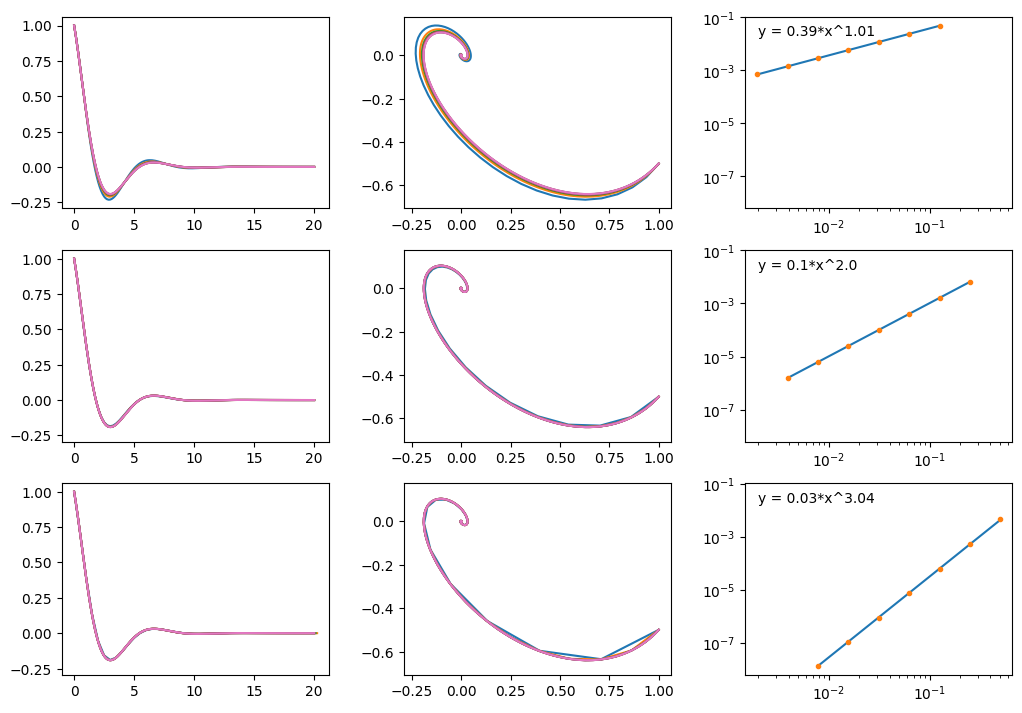

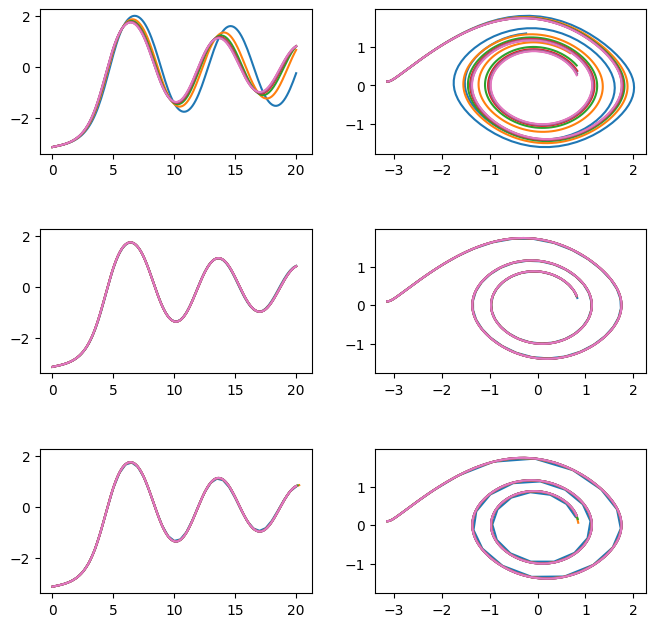

In [131]:
for p in PROBLEMS:
    p.test([np.exp(-np.log(2)*i) for i in np.arange(3,10,1)],20)